# Решаем уравнение простой линейной регрессии

В статье рассматривается несколько способов определения математического уравнения линии простой (парной) регрессии. 

Все рассматриваемые здесь способы решения уравнения основаны на методе наименьших квадратов. Обозначим способы следующим образом:

- Аналитическое решение
- Градиентный спуск
- Стохастический градиентный спуск

Для каждого из способов решения уравнения прямой, в статье приведены различные функции, которые в основном делятся на те, которые написаны без использования библиотеки *NumPy* и те, которые для проведения расчетов применяют *NumPy*. Считается, что умелое использование *NumPy* позволит сократить затраты на вычисления.

Весь код, приведенный в статье, написан на языке *python 2.7* с использованием *Jupyter Notebook*. Исходный код и файл с данными выборки выложен на *Гитхабе*

Статья в большей степени ориентирована как на начинающих, так и на тех, кто уже понемногу начал осваивать изучение весьма обширного раздела в искусственном интеллекте - машинного обучения.

Для иллюстрации материала используем очень простой пример.
## Условия примера

У нас есть $пять$ значений, которые характеризуют зависимость $Y$ от $X$ (Таблица №1):

In [659]:
# здесь будет картинка таблицы на Хабре

Будем считать, что значения $x_i$ - это месяц года, а $y_i$ - выручка в этом месяце. Другими словами, выручка зависит от месяца года, а $x_i$ - единственный признак, от которого зависит выручка.

Пример так себе, как с точки зрения условной зависимости выручки от месяца года, так и с точки зрения количества значений - их очень мало. Однако такое упрощение позволит, что называется на пальцах, объяснить, не всегда с легкостью, усваиваемый новичками материал. А также простота чисел позволит без весомых трудозатрат, желающим, порешать пример на "бумаге".

Предположим, что приведенная в примере зависимость, может быть достаточно хорошо аппроксимирована математическим уравнением линии простой (парной) регрессии вида:
$$Y=a + bx$$
, где $x$ - это месяц, в котором была получена выручка, $Y$ - выручка, соответствующая месяцу, $a$ и $b$ - коэффициенты регрессии оцененной линии. 

Отметим, что коэффициент $b$ часто называют угловым коэффициентом или градиентом оцененной линии; представляет собой величину, на которую изменится $Y$ при изменении $x$.

Очевидно, что наша задача в примере - подобрать в уравнении такие коэффициенты $a$ и $b$, при которых отклонения наших расчетных значений выручки по месяцам от истинных ответов, т.е. значений, представленных в выборке, будут минимальны.
## Метод наименьших квадратов
В соответствии с методом наименьших квадратов, отклонение стоит рассчитывать, возводя его в квадрат. Подобный прием позволяет избежать взаимного погашения отклонений, в том случае, если они имеют противоположные знаки. Например, если в одном случае, отклонение составляет **+5** (плюс пять), а в другом **-5** (минус пять), то **сумма отклонений взаимно погасится и составит 0 (ноль)**. Можно и не возводить отклонение в квадрат, а воспользоваться свойством модуля и тогда у нас все отклонения будут положительными и будут накапливаться. Мы не будем останавливаться на этом моменте подробно, а просто обозначим, что для удобства расчетов, принято возводить отклонение в квадрат.

Вот так выглядит формула, с помощью которой мы определим наименьшую сумму квадратов отклонений (ошибки):
$$ERR(x)=\sum\limits_{i=1}^n(a + bx_i - y_i)^2 = \sum\limits_{i=1}^n(f(x_i)-y_i)^2 \rightarrow min,$$
$ \textit{где $f(x_i)=a + bx_i$ - это функция аппроксимации истинных ответов (то есть посчитанная нами выручка),} $ 

$ \textit{$y_i$ - это истинные ответы (предоставленная в выборке выручка)} $,

$ \textit{$i$ - это индекс выборки (номер месяца, в котором происходит определение отклонения)} $


Продифференцируем функцию, определим уравнения частных производных и будем готовы перейти к аналитическому решению. Но для начала проведем небольшой экскурс о том, что такое дифференцирование и вспомним геометрический смысл производной.
## Дифференцирование
Дифференцированием называется операция по нахождению производной функции. 

Для чего нужна производная? **Производная функции характеризует скорость изменения функции и указывает нам ее направление**. Если производная в заданной точке положительна, то функция возрастает, в обратном случае - функция убывает. И чем больше значение производной по модулю, тем выше скорость изменения значений функции, а также круче угол наклона графика функции. 

Например, в условиях декартовой системы координат, значение производной в точке M(0,0) равное $+25$ означает, что в заданной точке, при смещении значения $x$ вправо на условную единицу, значение $y$ возрастает на 25 условных единиц. На графике это выглядит, как достаточно крутой угол подъема значений $y$ с заданной точки. 

Другой пример. Значение производной равное $-0,1$ означает, что при смещении $x$ на одну условную единицу, значение $y$ убывает всего лишь на 0,1 условную единицу. При этом, на графике функции, мы можем наблюдать едва заметный наклон вниз. Проводя аналогию с горой, то мы как будто очень медленно спускаемся по пологому склону с горы, в отличие от предыдущего примера, где нам приходилось брать очень крутые вершины:)


Таким образом, проведя дифференцирование функции $ERR(x)=\sum\limits_{i=1}^n(a + bx_i - y_i)^2$ по коэффициентам $a$ и $b$, определим уравнения частных производных 1-го порядка. После определения уравнений, мы получим систему из двух уравнений, решив которую мы сможем подобрать такие значения коэффициентов $a$ и $b$, при которых значения соответствующих производных в заданных точках изменяются на очень и очень малую величину, а в случае с аналитическим решением не изменяются вовсе. Другими словами, функция ошибки при найденных коэффициентах достигнет минимума, так как значения частных производных в этих точках будут равны нулю. 

Итак, по правилам дифференцирования *уравнение частной производной 1-го порядка по коэффициенту $a$ примет вид:*

$$ 2na + 2b\sum\limits_{i=1}^nx_i - 2\sum\limits_{i=1}^ny_i = 2(na + b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i) $$,

*уравнение частной производной 1-го порядка по $b$ примет вид:*

$$ 2a\sum\limits_{i=1}^nx_i + 2b\sum\limits_{i=1}^nx^2_i - 2\sum\limits_{i=1}^nx_iy_i = 2\sum\limits_{i=1}^nx_i(a +b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i) $$

**В итоге мы получили систему уравнений, которая имеет достаточно простое аналитическое решение:**


\begin{equation*}
 \begin{cases}
   na + b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i = 0
   \\
   \sum\limits_{i=1}^nx_i(a +b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i) = 0
 \end{cases}
\end{equation*}

Прежде чем решать уравнение, предварительно загрузим, проверим правильность загрузки и отформатируем данные. 

## Загрузка и форматирование данных
Необходимо отметить, что в связи с тем, что для аналитического решения, а в дальнейшем для градиентного и стохастического градиентного спуска, мы будем применять код в двух вариациях: с использованием библиотеки *NumPy* и без её использования, то нам потребуется соответствующее форматирование данных (см. код).

In [660]:
# импортируем все нужные нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl
import random

# графики отобразим в Jupyter
%matplotlib inline

# укажем размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# загрузим значения
table_zero = pd.read_csv('data_example.txt', header=0, sep='\t')

# посмотрим информацию о таблице и на саму таблицу
print table_zero.info()
print '********************************************'
print table_zero
print '********************************************'

# подготовим данные без использования NumPy

x_us = []
[x_us.append(float(i)) for i in table_zero['x']]
print x_us
print type(x_us)
print '********************************************'

y_us = []
[y_us.append(float(i)) for i in table_zero['y']]
print y_us
print type(y_us)
print '********************************************'

# подготовим данные с использованием NumPy

x_np = table_zero[['x']].values
print x_np
print type(x_np)
print x_np.shape
print '********************************************'

y_np = table_zero[['y']].values
print y_np
print type(y_np)
print y_np.shape
print '********************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
x    5 non-null int64
y    5 non-null float64
dtypes: float64(1), int64(1)
memory usage: 152.0 bytes
None
********************************************
   x    y
0  1  5.3
1  2  6.3
2  3  4.8
3  4  3.8
4  5  3.3
********************************************
[1.0, 2.0, 3.0, 4.0, 5.0]
<type 'list'>
********************************************
[5.3, 6.3, 4.8, 3.8, 3.3]
<type 'list'>
********************************************
[[1]
 [2]
 [3]
 [4]
 [5]]
<type 'numpy.ndarray'>
(5L, 1L)
********************************************
[[5.3]
 [6.3]
 [4.8]
 [3.8]
 [3.3]]
<type 'numpy.ndarray'>
(5L, 1L)
********************************************


## Визуализация
Теперь, после того, как мы, во-первых, загрузили данные, во-вторых, проверили правильность загрузки и наконец отформатировали данные, проведем первую визуализацию. Часто для этого используют метод *pairplot* библиотеки *Seaborn*. В нашем примере, ввиду ограниченности цифр нет смысла применять библиотеку Seaborn. Мы воспользуемся обычной библиотекой *Matplotlib* и посмотрим только на диаграмму рассеяния.

Грфик№1 "Зависимость выручки от месяца года"


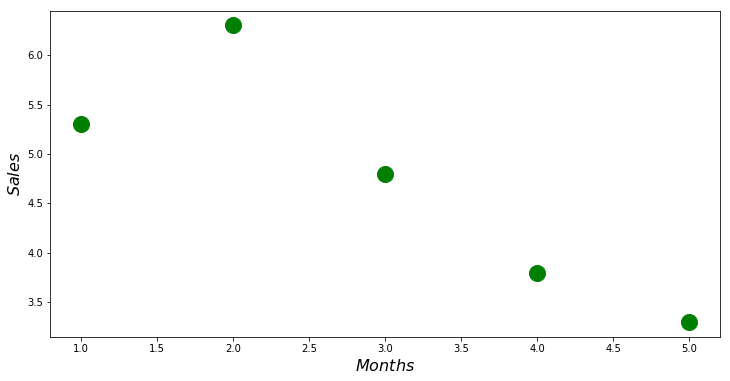

In [661]:
print 'Грфик№1 "Зависимость выручки от месяца года"'

plt.plot(x_us,y_us,'o',color='green',markersize=16)
plt.xlabel('$Months$', size=16)
plt.ylabel('$Sales$', size=16)
plt.show()

## Аналитическое решение
Воспользуемся самыми обычными инструментами в *python* и решим систему уравнений:

\begin{equation*}
 \begin{cases}
   na + b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i = 0
   \\
   \sum\limits_{i=1}^nx_i(a +b\sum\limits_{i=1}^nx_i - \sum\limits_{i=1}^ny_i) = 0
 \end{cases}
\end{equation*}


*По правилу Крамера* найдем общий определитель, а также определители по $a$ и по $b$, после чего, разделив определитель по $a$ на общий определитель - найдем коэффициент $a$, аналогично найдем коэффициент $b$.

In [662]:
# определим функцию для расчета коэффициентов a и b по правилу Крамера
def Kramer_method (x,y):
        # сумма значений (все месяца)
    sx = sum(x)
        # сумма истинных ответов (выручка за весь период)
    sy = sum(y)
        # сумма произведения значений на истинные ответы
    list_xy = []
    [list_xy.append(x[i]*y[i]) for i in range(len(x))]
    sxy = sum(list_xy)
        # сумма квадратов значений
    list_x_sq = []
    [list_x_sq.append(x[i]**2) for i in range(len(x))]
    sx_sq = sum(list_x_sq)
        # количество значений
    n = len(x)
        # общий определитель
    det = sx_sq*n - sx*sx
        # определитель по a
    det_a = sx_sq*sy - sx*sxy
        # искомый параметр a
    a = (det_a / det)
        # определитель по b
    det_b = sxy*n - sy*sx
        # искомый параметр b
    b = (det_b / det)
        # контрольные значения (прооверка)
    check1 = (n*b + a*sx - sy)
    check2 = (b*sx + a*sx_sq - sxy)
    return [round(a,4), round(b,4)]

# запустим функцию и запишем правильные ответы
ab_us = Kramer_method(x_us,y_us)
a_us = ab_us[0]
b_us = ab_us[1]
print '\033[1m' + '\033[4m' + "Оптимальные значения коэффициентов a и b:"  + '\033[0m' 
print 'a =', a_us
print 'b =', b_us
print

# определим функцию для подсчета суммы квадратов ошибок
def errors_sq_Kramer_method(answers,x,y):
    list_errors_sq = []
    for i in range(len(x)):
        err = (answers[0] + answers[1]*x[i] - y[i])**2
        list_errors_sq.append(err)
    return sum(list_errors_sq)

# запустим функцию и запишем значение ошибки
error_sq = errors_sq_Kramer_method(ab_us,x_us,y_us)
print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений" + '\033[0m'
print error_sq
print

# замерим время расчета
# print '\033[1m' + '\033[4m' + "Время выполнения расчета суммы квадратов отклонений:" + '\033[0m'
# % timeit error_sq = errors_sq_Kramer_method(ab,x_us,y_us)

Оптимальные значения коэффициентов a и b:
a = 6.65
b = -0.65

Сумма квадратов отклонений
1.475



Итак, значения коэффициентов найдены, сумма квадратов отклонений установлена. Нарисуем на гистограмме рассеяния прямую линию в соответствии с найденными коэффициентами.

Грфик№2 "Правильные и расчетные ответы"


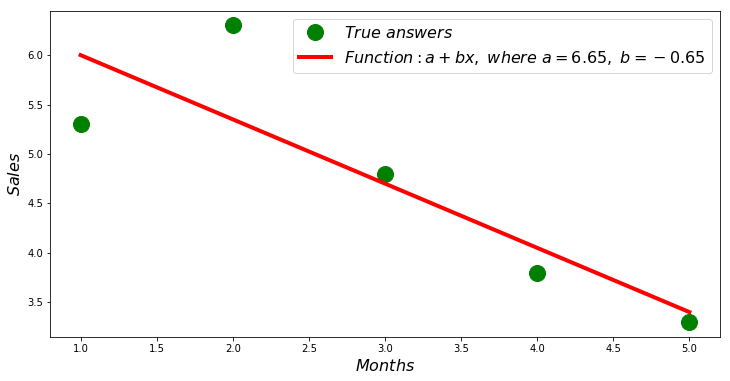

In [663]:
# определим функцию для формирования массива рассчетных значений выручки
def sales_count(ab,x,y):
    line_answers = []
    [line_answers.append(ab[0]+ab[1]*x[i]) for i in range(len(x))]
    return line_answers

# построим графики
print 'Грфик№2 "Правильные и расчетные ответы"'
plt.plot(x_us,y_us,'o',color='green',markersize=16, label = '$True$ $answers$')
plt.plot(x_us, sales_count(ab_us,x_us,y_us), color='red',lw=4,
         label='$Function: a + bx,$ $where$ $a='+str(round(ab_us[0],2))+',$ $b='+str(round(ab_us[1],2))+'$')
plt.xlabel('$Months$', size=16)
plt.ylabel('$Sales$', size=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

Можно посмотреть на график отклонений за каждый месяц. В нашем случае, какой-либо значимой практической ценности мы из него не вынесем, но удовлетворим любопытство в том, насколько хорошо, уравнение простой линейной регрессии характеризует зависимость выручки от месяца года.

График№3 "Отклонения по-месячно, %"


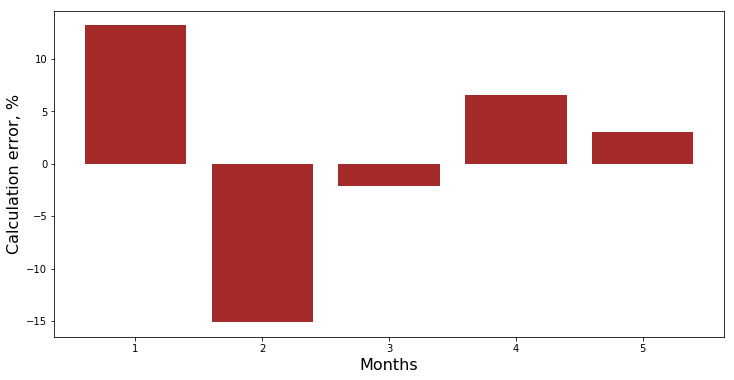

In [664]:
# определим функцию для формирования массива отклонений в процентах
def error_per_month(ab,x,y):
    sales_c = sales_count(ab,x,y)
    errors_percent = []
    for i in range(len(x)):
        errors_percent.append(100*(sales_c[i]-y[i])/y[i])
    return errors_percent

# построим график
print 'График№3 "Отклонения по-месячно, %"'
plt.gca().bar(x_us, error_per_month(ab_us,x_us,y_us), color='brown')
plt.xlabel('Months', size=16)
plt.ylabel('Calculation error, %', size=16)
plt.show()

Не идеально, но нашу задачу мы выполнили. 

Напишем функцию, которая для определения коэффициентов $a$ и $b$ использует библиотеку *NumPy*, точнее - напишем две функции: одну с использованием псевдообратной матрицы (не рекомендуется на практике, так как процесс вычислительно сложный и нестабильный), другую с использованием матричного уравнения.

In [665]:
# для начала добавим столбец с не изменяющимся значением в 1. 
# Данный столбец нужен для того, чтобы не обрабатывать отдельно коэффицент a
vector_1 = np.ones((x_np.shape[0],1))
x_np = table_zero[['x']].values # на всякий случай приведем в первичный формат вектор x_np
x_np = np.hstack((vector_1,x_np))

# проверим то, что все сделали правильно
print vector_1[0:3]
print x_np[0:3]
print '***************************************'
print

# напишем функцию, которая определяет значения коэффициентов a и b с использованием псевдообратной матрицы
def pseudoinverse_matrix(X, y):
    # задаем явный формат матрицы признаков
    X = np.matrix(X)
    # определяем транспонированную матрицу
    XT = X.T
    # определяем квадратную матрицу
    XTX = XT*X
    # определяем псевдообратную матрицу
    inv = np.linalg.pinv(XTX)
    # задаем явный формат матрицы ответов
    y = np.matrix(y)
    # находим вектор весов
    return (inv*XT)*y

# запустим функцию
ab_np = pseudoinverse_matrix(x_np, y_np)
print ab_np
print '***************************************'
print

# напишем функцию, которая использует для решения матричное уравнение
def matrix_equation(X,y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)

# запустим функцию
ab_np = matrix_equation(x_np,y_np)
print ab_np

[[1.]
 [1.]
 [1.]]
[[1. 1.]
 [1. 2.]
 [1. 3.]]
***************************************

[[ 6.65]
 [-0.65]]
***************************************

[[ 6.65]
 [-0.65]]


Сравним время, которое было затрачено на определение коэффициентов $a$ и $b$, в соответствии с 3-мя представленными способами.

In [666]:
print '\033[1m' + '\033[4m' + "Время выполнения расчета коэффициентов без использования библиотеки NumPy:" + '\033[0m'
% timeit ab_us = Kramer_method(x_us,y_us)
print '***************************************'
print
print '\033[1m' + '\033[4m' + "Время выполнения расчета коэффициентов с использованием псевдообратной матрицы:" + '\033[0m'
%timeit ab_np = pseudoinverse_matrix(x_np, y_np)
print '***************************************'
print
print '\033[1m' + '\033[4m' + "Время выполнения расчета коэффициентов с использованием матричного уравнения:" + '\033[0m'
%timeit ab_np = matrix_equation(x_np, y_np)

Время выполнения расчета коэффициентов без использования библиотеки NumPy:
100000 loops, best of 3: 6.66 µs per loop
***************************************

Время выполнения расчета коэффициентов с использованием псевдообратной матрицы:
10000 loops, best of 3: 98 µs per loop
***************************************

Время выполнения расчета коэффициентов с использованием матричного уравнения:
The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15 µs per loop


На небольшом количестве данных, вперед выходит "самописная" функция, которая находит коэффициенты методом Крамера.

Теперь можно перейти к другим способам нахождения коэффициентов $a$ и $b$.

## Градиентный спуск
Для начала определим, что такое градиент. По-простому, градиент - это отрезок, который указывает направление максимального роста функции. По аналогии с подъемом в гору, то куда смотрит градиент, там и есть самый крутой подъем к вершине горы. Развивая пример с горой, вспоминаем, что на самом деле нам нужен самый крутой спуск, чтобы как можно быстрее достичь низины, то есть минимума - места где функция не возрастает и не убывает. В этом месте производная будет равна нулю. Следовательно, нам нужен не градиент, а антиградиент. Для нахождения антиградиента нужно всего лишь умножить градиент на **-1** (минус один).

Обратим внимание на то, что функция может иметь несколько минимумов, и опустившись в один из них по предложенному далее алгоритму, мы не сможем найти другой минимум, который возможно находится ниже найденного. Расслабимся, нам это не грозит! В нашем случае мы имеем дело с единственным минимумом, так как наша функция $\sum\limits_{i=1}^n(a + bx_i - y_i)^2$ на графике представляет собой обычную параболу. А как мы все должны прекрасно знать из школьного курса математики - у параболы существует только один минимум.

После того, как мы выяснили для чего нам потребовался градиент, а также то, что градиент - это отрезок, то есть вектор с заданными координатами, которые как раз являются теми самыми коэффициентами $a$ и $b$ мы можем реализовать градиентный спуск. 

Перед запуском, предлагаю прочитать буквально несколько предложений об алгоритме спуска:
 - Определяем псевдослучайным образом координаты коэффициентов $a$ и $b$. В нашем примере, мы будем определять коэффициенты вблизи нуля. Это является распространённой практикой, однако для каждого случая может быть предусмотрена своя практика.
 - От координаты $a$ вычитаем значение частной производной 1-го порядка в точке $a$. Так, если производная будет положительная, то функция возрастает. Следовательно, отнимая значение производной, мы будем двигаться в обратную сторону роста, то есть в сторону спуска. Если производная отрицательна, значит функция в этой точке убывает и отнимая значение производной мы двигаемся в сторону спуска. 
 - Проводим аналогичную операцию с координатой $b$: вычитаем значение частной производной в точке $b$.
 - Для того, чтобы не перескочить минимум и не улететь в далекий космос, необходимо установить размер шага в сторону спуска. В общем и целом, можно написать целую статью о том, как правильнее установить шаг и как его менять в процессе спуска, чтобы снизить затраты на вычисления. Но сейчас перед нами несколько иная задача, и мы научным методом "тыка" или как говорят в простонародье, эмпирическим путем, установим размер шага.
 - После того, как мы из заданных координат $a$ и $b$ вычли значения производных, получаем новые координаты $a$ и $b$. Делаем следующий шаг (вычитание), уже из рассчитанных координат. И так цикл запускается вновь и вновь, до тех пор, пока не будет достигнута требуемая сходимость.
 
 Все! Теперь мы готовы отправиться на поиски самого глубокого ущелья Марианской впадины. Приступаем.

In [667]:
# напишем функцию градиентного спуска без использования библиотеки NumPy. 
# Функция на вход принимает диапазоны значений x,y, длину шага (по умолчанию=0,1), допустимую погрешность(tolerance)
def gradient_descent_usual(x_us,y_us,l=0.1,tolerance=0.000000000001):
    # сумма значений (все месяца)
    sx = sum(x_us)
    # сумма истинных ответов (выручка за весь период)
    sy = sum(y_us)
    # сумма произведения значений на истинные ответы
    list_xy = []
    [list_xy.append(x_us[i]*y_us[i]) for i in range(len(x_us))]
    sxy = sum(list_xy)
    # сумма квадратов значений
    list_x_sq = []
    [list_x_sq.append(x_us[i]**2) for i in range(len(x_us))]
    sx_sq = sum(list_x_sq)
    # количество значений
    num = len(x_us)
    # начальные значения коэффициентов, определенные псевдослучайным образом
    a = float(random.uniform(-0.5, 0.5))
    b = float(random.uniform(-0.5, 0.5))
    # создаем массив с ошибками, для старта используем значения 1 и 0
    # после завершения спуска стартовые значения удалим
    errors = [1,0]
    # запускаем цикл спуска
    # цикл работает до тех пор, пока отклонение последней ошибки суммы квадратов от предыдущей, не будет меньше tolerance
    while abs(errors[-1]-errors[-2]) > tolerance:
        a_step = a - l*(num*a + b*sx - sy)/num
        b_step = b - l*(a*sx + b*sx_sq - sxy)/num
        a = a_step
        b = b_step
        ab = [a,b]
        errors.append(errors_sq_Kramer_method(ab,x_us,y_us))
    return (ab),(errors[2:])

# запишем массив значений 
list_parametres_gradient_descence = gradient_descent_usual(x_us,y_us,l=0.1,tolerance=0.000000000001)


print '\033[1m' + '\033[4m' + "Значения коэффициентов a и b:" + '\033[0m'
print 'a =', round(list_parametres_gradient_descence[0][0],3)
print 'b =', round(list_parametres_gradient_descence[0][1],3)
print


print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений:" + '\033[0m'
print round(list_parametres_gradient_descence[1][-1],3)
print



print '\033[1m' + '\033[4m' + "Количество итераций в градиентном спуске:" + '\033[0m'
print len(list_parametres_gradient_descence[1])
print

Значения коэффициентов a и b:
a = 6.65
b = -0.65

Сумма квадратов отклонений:
1.475

Количество итераций в градиентном спуске:
815



Мы погрузились на самое дно Марианской впадины и там обнаружили все те же значения коэффициентов $a$ и $b$, что собственно и следовало ожидать.

Совершим еще одно погружение, только на этот раз, начинкой нашего глубоководного аппарата будут иные технологии, а именно библиотека *NumPy*.

In [668]:
# перед тем определить функцию для градиентного спуска с использованием библиотеки NumPy, 
# напишем функцию определения суммы квадратов отклонений также с использованием NumPy
def error_square_numpy(ab,x_np,y_np):
    y_pred = np.dot(x_np,ab)
    error = y_pred - y_np
    return sum((error)**2)

# напишем функцию градиентного спуска с использованием библиотеки NumPy. 
# Функция на вход принимает диапазоны значений x,y, длину шага (по умолчанию=0,1), допустимую погрешность(tolerance)
def gradient_descent_numpy(x_np,y_np,l=0.1,tolerance=0.000000000001):
    # сумма значений (все месяца)
    sx = float(sum(x_np[:,1]))
    # сумма истинных ответов (выручка за весь период)
    sy = float(sum(y_np))
    # сумма произведения значений на истинные ответы
    sxy = x_np*y_np
    sxy = float(sum(sxy[:,1]))
    # сумма квадратов значений
    sx_sq = float(sum(x_np[:,1]**2))
    # количество значений
    num = float(x_np.shape[0])
    # начальные значения коэффициентов, определенные псевдослучайным образом
    a = float(random.uniform(-0.5, 0.5))
    b = float(random.uniform(-0.5, 0.5))
    # создаем массив с ошибками, для старта используем значения 1 и 0
    # после завершения спуска стартовые значения удалим
    errors = [1,0]
    # запускаем цикл спуска
    # цикл работает до тех пор, пока отклонение последней ошибки суммы квадратов от предыдущей, не будет меньше tolerance
    while abs(errors[-1]-errors[-2]) > tolerance:
        a_step = a - l*(num*a + b*sx - sy)/num
        b_step = b - l*(a*sx + b*sx_sq - sxy)/num
        a = a_step
        b = b_step
        ab = np.array([[a],[b]])
        errors.append(error_square_numpy(ab,x_np,y_np))
    return (ab),(errors[2:])

# запишем массив значений 
list_parametres_gradient_descence = gradient_descent_numpy(x_np,y_np,l=0.1,tolerance=0.000000000001)

print '\033[1m' + '\033[4m' + "Значения коэффициентов a и b:" + '\033[0m'
print 'a =', round(list_parametres_gradient_descence[0][0],3)
print 'b =', round(list_parametres_gradient_descence[0][1],3)
print


print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений:" + '\033[0m'
print round(list_parametres_gradient_descence[1][-1],3)
print



print '\033[1m' + '\033[4m' + "Количество итераций в градиентном спуске:" + '\033[0m'
print len(list_parametres_gradient_descence[1])
print

Значения коэффициентов a и b:
a = 6.65
b = -0.65

Сумма квадратов отклонений:
1.475

Количество итераций в градиентном спуске:
818



Значения коэффициентов $a$ и $b$ неизменны.

Построим на то, как изменялась ошибка при градиентном спуске, то есть как изменялась сумма квадратов отклонений с каждым шагом.

График№4 "Сумма квадратов отклонений по-шагово"


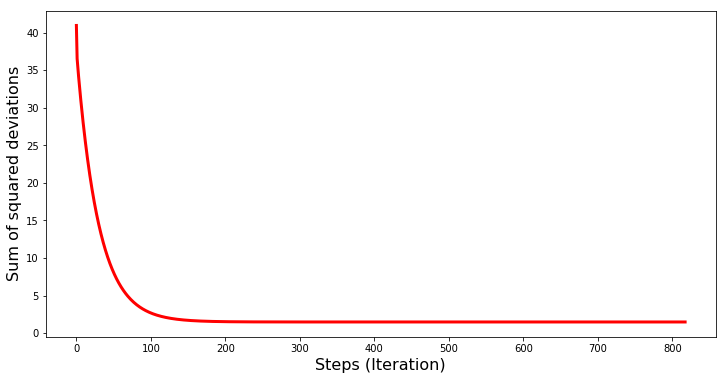

In [669]:
print 'График№4 "Сумма квадратов отклонений по-шагово"'
plt.plot(range(len(list_parametres_gradient_descence[1])), list_parametres_gradient_descence[1], color='red', lw=3)
plt.xlabel('Steps (Iteration)', size=16)
plt.ylabel('Sum of squared deviations', size=16)
plt.show()

На графике мы видим, что с каждым шагом ошибка уменьшается, а спустя какое-то количество итераций наблюдаем практически горизонтальную линию.

Напоследок оценим разницу во времени исполнения кода:

In [670]:
print '\033[1m' + '\033[4m' + "Время выполнения градиентного спуска без использования библиотеки NumPy:" + '\033[0m'
%timeit list_parametres_gradient_descence = gradient_descent_usual(x_us,y_us,l=0.1,tolerance=0.000000000001)
print '***************************************'
print

print '\033[1m' + '\033[4m' + "Время выполнения градиентного спуска с использованием библиотеки NumPy:" + '\033[0m'
%timeit list_parametres_gradient_descence = gradient_descent_numpy(x_np,y_np,l=0.1,tolerance=0.000000000001)

Время выполнения градиентного спуска без использования библиотеки NumPy:
100 loops, best of 3: 2.87 ms per loop
***************************************

Время выполнения градиентного спуска с использованием библиотеки NumPy:
100 loops, best of 3: 12 ms per loop


Возможно мы делаем что-то не то, но опять простая "самописная" функция, которая не использует библиотеку *NumPy* опережает по времени выполнения расчетов функцию, использующую библиотеку *NumPy*. 

Но мы не стоим на месте, а двигаемся в сторону изучения еще одного увлекательного способа решения уравнения простой линейной регрессии. Встречайте! 

## Стохастический градиентный спуск
Для того, чтобы быстрее понять принцип работы стохастического градиентного спуска, лучше определить его отличия от обычного градиентного спуска. Мы, в случае с градиентным спуском, в уравнениях производных от $a$ и $b$ использовали суммы значений всех признаков и истинных ответов, имеющихся в выборке (то есть суммы всех $x_i$ и $y_i$). В стохастическом градиентном спуске мы не будем использовать все значения, имеющиеся в выборке, а вместо этого, псевдослучайным образом выберем так называемый индекс выборки и используем его значения. 

Например, если индекс определился за номером 3 (три), то мы берем значения $x_3=3$ и $y_3=4,8$, далее подставляем значения в уравнения производных и определяем новые координаты. Затем, определив координаты, мы опять псевдослучайным образом определяем индекс выборки, подставляем значения, соответствующие индексу в уравнения частных производных, по новому определяем координаты $a$ и $b$ и т.д. до ~~позеленения~~ сходимости. На первый взгляд, может показаться, как это вообще может работать, однако работает. Правда стоит отметить, что не с каждым шагом уменьшается ошибка, но тенденция безусловно имеется.

Каковы преимущества стохастического градиентного спуска перед обычным? В случае, если у нас размер выборки очень велик и измеряется десятками тысяч значений, то значительно проще обработать, допустим случайную тысячу из них, нежели всю выборку. Вот в этом случае и запускается стохастический градиентный спуск. В нашем случае мы конечно же большой разницы не заметим.

Смотрим код.

In [671]:
# определим функцию стох.град.шага
def stoch_grad_step_usual(vector_init, x_us, ind, y_us, l):
#     выбираем значение икс, которое соответствует случайному значению параметра ind 
# (см.ф-цию stoch_grad_descent_usual)
    x = x_us[ind]
#     рассчитывыаем значение y (выручку), которая соответствует выбранному значению x
    y_pred = vector_init[0] + vector_init[1]*x_us[ind]
#     вычисляем ошибку расчетной выручки относительно представленной в выборке
    error = y_pred - y_us[ind]
#     определяем первую координату градиента ab
    grad_a = error
#     определяем вторую координату ab
    grad_b = x_us[ind]*error
#     вычисляем новый вектор коэффициентов
    vector_new = [vector_init[0]-l*grad_a, vector_init[1]-l*grad_b]
    return vector_new


# определим функцию стох.град.спуска
def stoch_grad_descent_usual(x_us, y_us, l=0.1, steps = 800):
#     для самого начала работы функции зададим начальные значения коэффициентов
    vector_init = [float(random.uniform(-0.5, 0.5)), float(random.uniform(-0.5, 0.5))]
    errors = []
#     запустим цикл спуска
# цикл расчитан на определенное количество шагов (steps)
    for i in range(steps):
        ind = random.choice(range(len(x_us)))
        new_vector = stoch_grad_step_usual(vector_init, x_us, ind, y_us, l)
        vector_init = new_vector
        errors.append(errors_sq_Kramer_method(vector_init,x_us,y_us))
    return (vector_init),(errors)


# запишем массив значений 
list_parametres_stoch_gradient_descence = stoch_grad_descent_usual(x_us, y_us, l=0.1, steps = 800)

print '\033[1m' + '\033[4m' + "Значения коэффициентов a и b:" + '\033[0m'
print 'a =', round(list_parametres_stoch_gradient_descence[0][0],3)
print 'b =', round(list_parametres_stoch_gradient_descence[0][1],3)
print


print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений:" + '\033[0m'
print round(list_parametres_stoch_gradient_descence[1][-1],3)
print



print '\033[1m' + '\033[4m' + "Количество итераций в стохастическом градиентном спуске:" + '\033[0m'
print len(list_parametres_stoch_gradient_descence[1])

Значения коэффициентов a и b:
a = 6.289
b = -1.095

Сумма квадратов отклонений:
17.817

Количество итераций в стохастическом градиентном спуске:
800


Как же так! У нас получились другие значения коэффициентов $a$ и $b$. Может быть стохастический градиентный спуск нашел более оптимальные параметры уравнения? Увы, нет. Достаточно посмотреть на сумму квадратов отклонений и увидеть, что при новых значениях коэффициентов, ошибка больше. Не спешим отчаиваться. Построим график изменения ошибки.

График №5 "Сумма квадратов отклонений по-шагово"


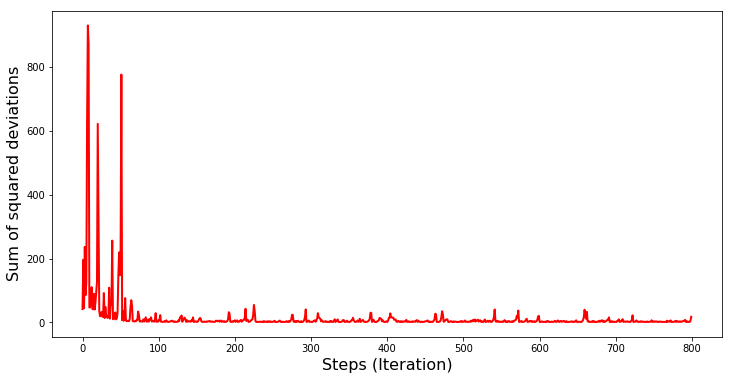

In [672]:
print 'График №5 "Сумма квадратов отклонений по-шагово"'
plt.plot(range(len(list_parametres_stoch_gradient_descence[1])), list_parametres_stoch_gradient_descence[1], color='red', lw=2)
plt.xlabel('Steps (Iteration)', size=16)
plt.ylabel('Sum of squared deviations', size=16)
plt.show()

Посмотрев на график, все становится на свои места и сейчас мы все исправим. 

Итак, что же произошло? Произошло следующее. Когда мы выбираем случайным образом месяц, то именно для выбранного месяца наш алгоритм стремится уменьшить ошибку в расчете выручки. Затем выбираем другой месяц и повторяем расчет, но ошибку уменьшаем уже для второго выбранного месяца. А теперь вспомним, что у нас первые два месяца существенно отклоняются от линии уравнения простой линейной регрессии. Это значит, что когда выбирается любой из этих двух месяцев, то уменьшая ошибку каждого из них, наш алгоритм серьезно увеличивает ошибку по всей выборке. Так что же делать? Ответ простой: надо уменьшить шаг спуска. Ведь уменьшив шаг спуска, ошибка так же перестанет "скакать" то вверх, то вниз. Вернее, ошибка "скакать" не перестанет, но будет это делать не так прытко:) Проверим.

Значения коэффициентов a и b:
a = 6.65
b = -0.637

Сумма квадратов отклонений:
1.484

Количество итераций в стохастическом градиентном спуске:
80000
График №6 "Сумма квадратов отклонений по-шагово"


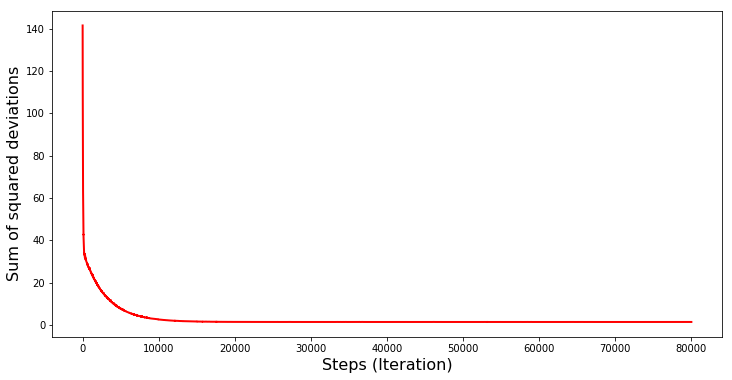

In [673]:
# запустим функцию, уменьшив шаг в 100 раз и увеличив количество шагов соответсвующе 
list_parametres_stoch_gradient_descence = stoch_grad_descent_usual(x_us, y_us, l=0.001, steps = 80000)

print '\033[1m' + '\033[4m' + "Значения коэффициентов a и b:" + '\033[0m'
print 'a =', round(list_parametres_stoch_gradient_descence[0][0],3)
print 'b =', round(list_parametres_stoch_gradient_descence[0][1],3)
print


print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений:" + '\033[0m'
print round(list_parametres_stoch_gradient_descence[1][-1],3)
print



print '\033[1m' + '\033[4m' + "Количество итераций в стохастическом градиентном спуске:" + '\033[0m'
print len(list_parametres_stoch_gradient_descence[1])

print 'График №6 "Сумма квадратов отклонений по-шагово"'
plt.plot(range(len(list_parametres_stoch_gradient_descence[1])), list_parametres_stoch_gradient_descence[1], color='red', lw=2)
plt.xlabel('Steps (Iteration)', size=16)
plt.ylabel('Sum of squared deviations', size=16)
plt.show()

Значения коэффициентов улучшились, но все равно не идеальны. Гипотетически это можно поправить таким образом. Выбираем, например, на последних 1000 итерациях значения коэффициентов, с которыми была допущена минимальная ошибка. Правда нам для этого придется записывать еще и сами значения коэффициентов. Мы не будем этого делать, а лучше обратим внимание на график. Он выглядит гладким, и ошибка как будто уменьшается равномерно. На самом деле это не так. Посмотрим на первые 1000 итераций и сравним их с последними.

График №7 "Сумма квадратов отклонений по-шагово. Первые 1000 итераций"


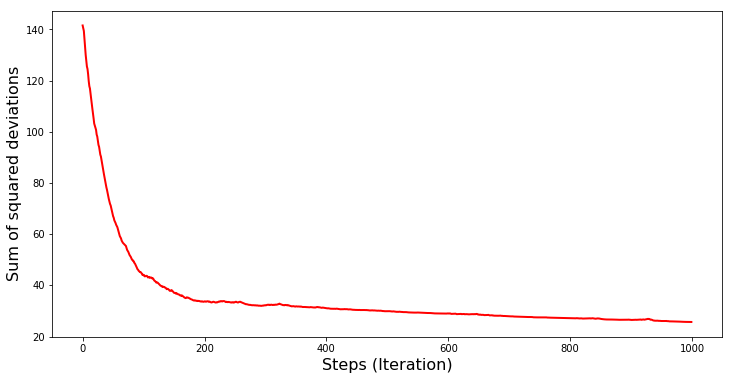

График №7 "Сумма квадратов отклонений по-шагово. Последние 1000 итераций"


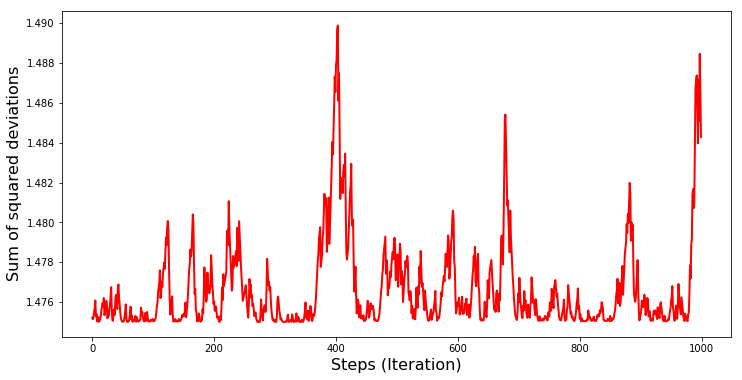

In [674]:
print 'График №7 "Сумма квадратов отклонений по-шагово. Первые 1000 итераций"'
plt.plot(range(len(list_parametres_stoch_gradient_descence[1][:1000])), 
         list_parametres_stoch_gradient_descence[1][:1000], color='red', lw=2)
plt.xlabel('Steps (Iteration)', size=16)
plt.ylabel('Sum of squared deviations', size=16)
plt.show()

print 'График №7 "Сумма квадратов отклонений по-шагово. Последние 1000 итераций"'
plt.plot(range(len(list_parametres_stoch_gradient_descence[1][-1000:])), 
         list_parametres_stoch_gradient_descence[1][-1000:], color='red', lw=2)
plt.xlabel('Steps (Iteration)', size=16)
plt.ylabel('Sum of squared deviations', size=16)
plt.show()

В самом начале спуска мы наблюдаем достаточно равномерное и крутое уменьшение ошибки. На последних итерациях мы видим, что ошибка ходит вокруг да около значения в 1,475 и в некоторые моменты даже равняется этому оптимальному значению, но потом все равно уходит ввысь... Повторюсь, можно записывать значения коэффициентов $a$ и $b$, а потом выбрать те, при которых ошибка минимальна. Однако у нас возникла проблема посерьезнее: нам пришлось сделать 80 тыс. шагов (см. код), чтобы получить значения, близкие к оптимальным. А это, уже противоречит идее об экономии времени вычислений при стохастическом градиентном спуске относительно градиентного. Что можно поправить и улучшить? Не трудно заметить, что на первых итерациях мы уверенно идем вниз и, следовательно, нам стоит оставить большой шаг на первых итерациях и по мере продвижения вперед шаг уменьшать. Мы не будем этого делать в этой статье - она и так уже затянулась. Желающие могут и сами подумать, как это сделать, это не сложно :)

Теперь выполним стохастический градиентный спуск, используя библиотеку *NumPy* (и не будем спотыкаться о камни, которые мы выявили раннее)

In [675]:
# для начала напишем функцию градиентного шага
def stoch_grad_step_numpy(vector_init, X, ind, y, l):
    x = X[ind]
    y_pred = np.dot(x,vector_init)
    err = y_pred - y[ind]
    grad_a = err
    grad_b = x[1]*err
    return vector_init - l*np.array([grad_a, grad_b])

# определим функцию стохастического градиентного спуска
def stoch_grad_descent_numpy(X, y, l=0.1, steps = 800):
    vector_init = np.array([[np.random.randint(X.shape[0])], [np.random.randint(X.shape[0])]])
    errors = []
    for i in range(steps):
        ind = np.random.randint(X.shape[0])
        new_vector = stoch_grad_step_numpy(vector_init, X, ind, y, l)
        vector_init = new_vector
        errors.append(error_square_numpy(vector_init,X,y))
    return (vector_init), (errors)

# запишем массив значений 
list_parametres_stoch_gradient_descence = stoch_grad_descent_numpy(x_np, y_np, l=0.001, steps = 80000)

print '\033[1m' + '\033[4m' + "Значения коэффициентов a и b:" + '\033[0m'
print 'a =', round(list_parametres_stoch_gradient_descence[0][0],3)
print 'b =', round(list_parametres_stoch_gradient_descence[0][1],3)
print


print '\033[1m' + '\033[4m' + "Сумма квадратов отклонений:" + '\033[0m'
print round(list_parametres_stoch_gradient_descence[1][-1],3)
print



print '\033[1m' + '\033[4m' + "Количество итераций в стохастическом градиентном спуске:" + '\033[0m'
print len(list_parametres_stoch_gradient_descence[1])
print

Значения коэффициентов a и b:
a = 6.637
b = -0.658

Сумма квадратов отклонений:
1.483

Количество итераций в стохастическом градиентном спуске:
80000



Значения получились почти такими же, как и при спуске без использования *NumPy*. Впрочем, это логично. 

Узнаем сколько же времени занимали у нас стохастические градиентные спуски.

In [ ]:
print '\033[1m' + '\033[4m' +\
"Время выполнения стохастического градиентного спуска без использования библиотеки NumPy:"\
+ '\033[0m'
%timeit list_parametres_stoch_gradient_descence = stoch_grad_descent_usual(x_us, y_us, l=0.001, steps = 80000)
print '***************************************'
print

print '\033[1m' + '\033[4m' +\
"Время выполнения стохастического градиентного спуска с использованием библиотеки NumPy:"\
+ '\033[0m'
%timeit list_parametres_stoch_gradient_descence = stoch_grad_descent_numpy(x_np, y_np, l=0.001, steps = 80000)

Время выполнения стохастического градиентного спуска без использования библиотеки NumPy:
1 loop, best of 3: 347 ms per loop
***************************************

Время выполнения стохастического градиентного спуска с использованием библиотеки NumPy:


Чем дальше в лес, тем темнее тучи: опять "самописная" формула показывает лучший результат. Все это наводит на мысли о том, что должны существовать еще более тонкие способы использования библиотеки *NumPy*, которые действительно ускоряют операции вычислений. В этой статье мы о них уже не узнаем. Будет о чем подумать на досуге:)

## Резюмируем
Перед тем как резюмировать, хотелось бы ответить на вопрос, который скорее всего, возник у нашего дорогого читателя. Для чего, собственно, такие "мучения" со спусками, зачем нам ходить по горе вверх и вниз (преимущественно вниз), чтобы найти заветную низину, если в наших руках такой мощный и простой прибор, в виде аналитического решения, который мгновенно телепортирует нас в нужное место?

Ответ на этот вопрос лежит на поверхности. Сейчас мы разбирали очень простой пример, в котором истинный ответ $y_i$ зависит от одного признака $x_i$. В жизни такое встретишь не часто, поэтому представим, что у нас признаков 2, 30, 50 и более. Добавим к этому тысячи, а то и десятки тысяч значений для каждого признака. В этом случае аналитическое решение может не выдержать испытания и дать сбой. В свою очередь градиентный спуск и его вариации будут медленно, но верно приближать нас к цели - минимуму функции. А на счет скорости не волнуйтесь - мы наверняка еще разберем способы, которые позволят нам задавать и регулировать длину шага (то есть скорость).

А теперь собственно краткое резюме. 

Во-первых, надеюсь, что изложенный в статье материал, поможет начинающим "дата сайнтистам" в понимании того, как решать уравнения простой (и не только) линейной регрессии. 

Во-вторых, мы рассмотрели несколько способов решения уравнения. Теперь, в зависимости от ситуации, мы можем выбрать тот, который лучше всего подходит для решения поставленной задачи. 

В-третьих, мы увидели силу дополнительных настроек, а именно длины шага градиентного спуска. Этим параметром нельзя пренебрегать. Как было подмечено выше, с целью сокращения затрат на проведение вычислений, длину шага стоит изменять по ходу спуска.

В-четвертых, в нашем случае, "самописные" функции показали лучший временной результат вычислений. Вероятно, это связано с не самым профессиональным применением возможностей библиотеки *NumPy*. Но как бы то ни было, вывод напрашивается следующий. С одной стороны, иногда стоит подвергать сомнению устоявшиеся мнения, а с другой - не всегда стоит все усложнять - наоборот иногда эффективнее оказывается более простой способ решения задачи. А так как цель у нас была разобрать три подхода в решении уравнения простой линейной регрессии, то использование "самописных" функций нам вполне хватило.


## Литература
1.	Линейная регрессия

http://statistica.ru/theory/osnovy-lineynoy-regressii/

2.	Метод наименьших квадратов

http://mathprofi.ru/metod_naimenshih_kvadratov.html

3.	Производная 

http://www.mathprofi.ru/chastnye_proizvodnye_primery.html

4.	Градиент 

http://mathprofi.ru/proizvodnaja_po_napravleniju_i_gradient.html

5.	Градиентный спуск

https://habr.com/ru/post/471458/

https://habr.com/ru/post/307312/

http://artemarakcheev.com//2017-12-31/linear_regression

6.	Библиотека NumPy

https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html

https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html

https://pythonworld.ru/numpy/2.html